In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay

In [2]:
btc = pd.read_csv('/content/btcusd_1-min_data.csv')

In [3]:
btc = btc.dropna()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = btc.drop('Close', axis = 1).copy()
y = btc['Close'].values

In [6]:
np.array(y).reshape(-1, 1)

array([[  4.58],
       [  4.58],
       [  4.58],
       ...,
       [565.99],
       [565.99],
       [565.99]])

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=123)

In [8]:
clf =  xgb.XGBRegressor(objective="reg:squarederror", n_estimators=40, early_stopping_rounds = 10, seed=123, gamma = 0.25, eta = 1)

In [9]:
clf.fit(Xtrain, (np.array(ytrain)).reshape(-1, 1),verbose= True, eval_set=[(Xtest, (np.array(ytest)).reshape(-1, 1))])

bst = clf.get_booster()
print (bst.best_score, bst.best_iteration)

[0]	validation_0-rmse:4.46162
[1]	validation_0-rmse:4.08703
[2]	validation_0-rmse:3.92625
[3]	validation_0-rmse:3.79800
[4]	validation_0-rmse:3.74584
[5]	validation_0-rmse:3.63556
[6]	validation_0-rmse:3.56134
[7]	validation_0-rmse:3.54247
[8]	validation_0-rmse:3.49950
[9]	validation_0-rmse:3.45606
[10]	validation_0-rmse:3.43548
[11]	validation_0-rmse:3.42865
[12]	validation_0-rmse:3.41775
[13]	validation_0-rmse:3.38094
[14]	validation_0-rmse:3.37289
[15]	validation_0-rmse:3.35581
[16]	validation_0-rmse:3.33906
[17]	validation_0-rmse:3.33070
[18]	validation_0-rmse:3.31904
[19]	validation_0-rmse:3.30830
[20]	validation_0-rmse:3.30548
[21]	validation_0-rmse:3.30118
[22]	validation_0-rmse:3.28782
[23]	validation_0-rmse:3.28277
[24]	validation_0-rmse:3.27895
[25]	validation_0-rmse:3.27527
[26]	validation_0-rmse:3.27731
[27]	validation_0-rmse:3.27903
[28]	validation_0-rmse:3.28201
[29]	validation_0-rmse:3.28071
[30]	validation_0-rmse:3.28356
[31]	validation_0-rmse:3.28577
[32]	validation_0-

In [10]:
preds = clf.predict(Xtest)
print(preds)

[ 12.757989   10.788901    4.8848944 ...  18.753304  101.109985
   5.0032725]


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

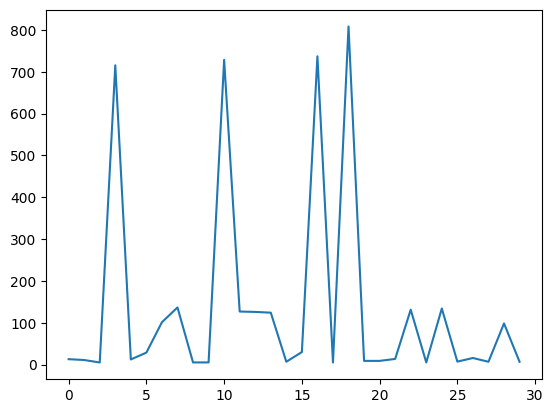

In [12]:
plt.plot(range(len(preds[:30])), preds[:30])

In [13]:
np.array((preds[:30])).flatten().shape

(30,)

<Axes: >

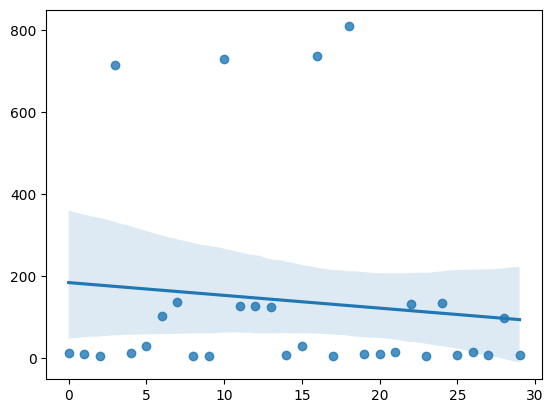

In [14]:
sns.regplot(x = np.array(range(len(preds[:30]))), y = np.array(preds[:30]).flatten())

<Axes: ylabel='Density'>

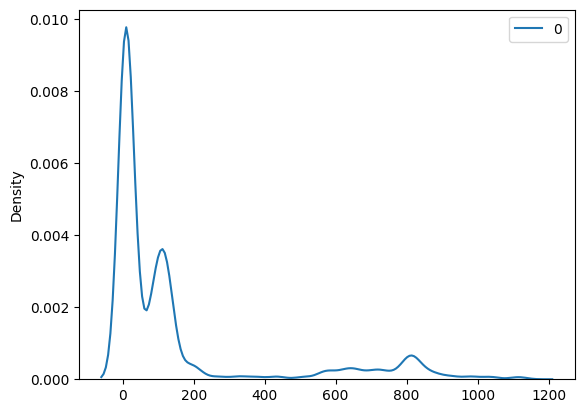

In [15]:
preds = pd.DataFrame(preds)
sns.kdeplot(data = preds)

In [16]:
preds.columns = ['x']
preds['t'] = preds.index
preds

,x,t
0,12.757989,0
1,10.788901,1
2,4.884894,2
3,715.283020,3
4,12.136443,4
...,...,...
228073,10.879041,228073
228074,11.366272,228074
228075,18.753304,228075
228076,101.109985,228076


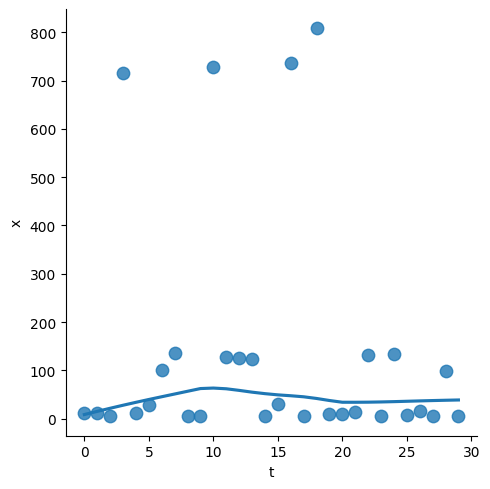

In [17]:
sns.lmplot(x = 't', y = 'x', data=preds[:30],lowess=True, ci = None, scatter_kws={"s": 80})

Shows better fit for a sample of the prediction values compared to a normal linear regression model, even with variance not explicitly modeled, but needed as point of improvement

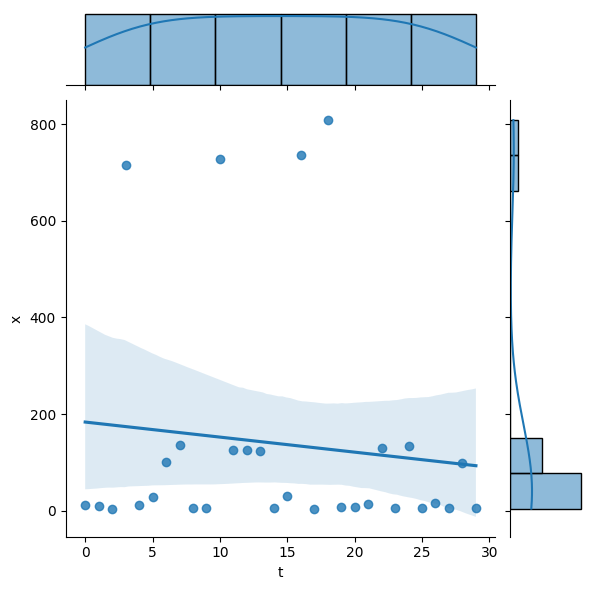

In [18]:
sns.jointplot(x="t", y="x", data=preds[:30], kind="reg")

Shows distributions of t (independent) and x (dependent), where t is comprised of purely unique values

In [34]:
dayloss = []
for i in btc['Open'] <= btc['Close']:
  if i == True:
    dayloss.append(0)
  else:
    dayloss.append(1)
btc ['Day Loss'] = dayloss

Added binary value for classification

In [35]:
btc['Day Loss'].value_counts()

,count
Day Loss,
0,1035027
1,105363


Surprise(0) = 0.14
Surprise(1) = 3.44

Assuming a measurement of 100 days, entropy = 0.4436.

In [36]:
X = btc.drop('Day Loss', axis = 1).copy()
y = btc['Day Loss']

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42, stratify = y)

In [38]:
sum(ytrain)/len(ytrain)

0.09239183810909023

In [39]:
sum(ytest)/len(ytest)

0.09239279125072782

In [40]:
clf = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'aucpr', early_stopping_rounds = 10, missing = np.nan, seed = 42)
clf.fit(Xtrain, ytrain, verbose = True, eval_set = [(Xtest, ytest)])

bst = clf.get_booster()
print (bst.best_score, bst.best_iteration)

[0]	validation_0-aucpr:0.39108
[1]	validation_0-aucpr:0.39962
[2]	validation_0-aucpr:0.40942
[3]	validation_0-aucpr:0.41298
[4]	validation_0-aucpr:0.41699
[5]	validation_0-aucpr:0.41985
[6]	validation_0-aucpr:0.42107
[7]	validation_0-aucpr:0.42166
[8]	validation_0-aucpr:0.42509
[9]	validation_0-aucpr:0.42856
[10]	validation_0-aucpr:0.42906
[11]	validation_0-aucpr:0.43384
[12]	validation_0-aucpr:0.43966
[13]	validation_0-aucpr:0.43983
[14]	validation_0-aucpr:0.44196
[15]	validation_0-aucpr:0.44209
[16]	validation_0-aucpr:0.44802
[17]	validation_0-aucpr:0.45768
[18]	validation_0-aucpr:0.46678
[19]	validation_0-aucpr:0.46797
[20]	validation_0-aucpr:0.46807
[21]	validation_0-aucpr:0.47492
[22]	validation_0-aucpr:0.47749
[23]	validation_0-aucpr:0.48111
[24]	validation_0-aucpr:0.48438
[25]	validation_0-aucpr:0.49351
[26]	validation_0-aucpr:0.49785
[27]	validation_0-aucpr:0.50142
[28]	validation_0-aucpr:0.50417
[29]	validation_0-aucpr:0.50606
[30]	validation_0-aucpr:0.50652
[31]	validation_0-

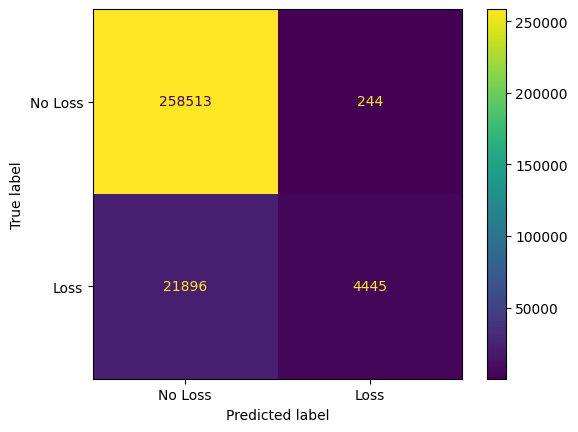

In [41]:
cm = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['No Loss', 'Loss'])

In [46]:
TP = 258513
FN = 244
FP = 21896
TN = 4445
misclassrate = (FN + FP)/ (TP + FN + FP + TN)
sens = TP/(TP + FN)
spec = TN/(TN + FP)
ppv = TP/(TP + FP)
npv = TN/(TN + FN)

In [42]:
clf = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'aucpr', early_stopping_rounds = 10,
                        gamma = 0.25, max_depth = 5, reg_lambda = 10,scale_pos_weight = 3,
                        subsample = 0.9, colsample_bytree = 0.5, missing = np.nan, seed = 42)
clf.fit(Xtrain, ytrain, verbose = True, eval_set = [(Xtest, ytest)])

bst = clf.get_booster()
print (bst.best_score, bst.best_iteration)

[0]	validation_0-aucpr:0.37802
[1]	validation_0-aucpr:0.38545
[2]	validation_0-aucpr:0.40614
[3]	validation_0-aucpr:0.40436
[4]	validation_0-aucpr:0.40509
[5]	validation_0-aucpr:0.40565
[6]	validation_0-aucpr:0.40723
[7]	validation_0-aucpr:0.41250
[8]	validation_0-aucpr:0.41242
[9]	validation_0-aucpr:0.41444
[10]	validation_0-aucpr:0.41605
[11]	validation_0-aucpr:0.41666
[12]	validation_0-aucpr:0.41795
[13]	validation_0-aucpr:0.41847
[14]	validation_0-aucpr:0.41830
[15]	validation_0-aucpr:0.41840
[16]	validation_0-aucpr:0.42186
[17]	validation_0-aucpr:0.42218
[18]	validation_0-aucpr:0.42167
[19]	validation_0-aucpr:0.42422
[20]	validation_0-aucpr:0.42717
[21]	validation_0-aucpr:0.42861
[22]	validation_0-aucpr:0.43468
[23]	validation_0-aucpr:0.43371
[24]	validation_0-aucpr:0.43572
[25]	validation_0-aucpr:0.43575
[26]	validation_0-aucpr:0.43587
[27]	validation_0-aucpr:0.43674
[28]	validation_0-aucpr:0.43732
[29]	validation_0-aucpr:0.43662
[30]	validation_0-aucpr:0.43648
[31]	validation_0-

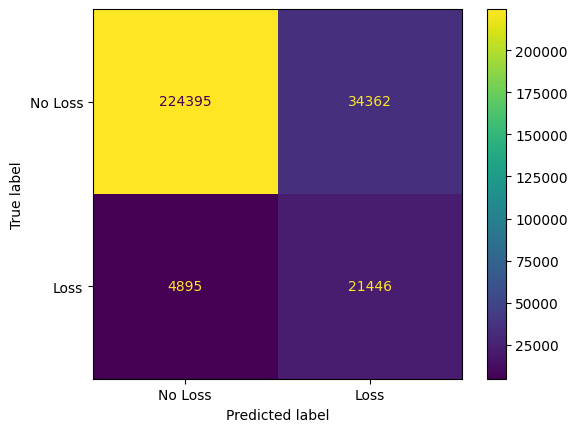

In [43]:
cm = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['No Loss', 'Loss'])

In [47]:
TP = 224395
FN = 34362
FP = 4895
TN = 21446
misclassrate = (FN + FP)/ (TP + FN + FP + TN)
sens = TP/(TP + FN)
spec = TN/(TN + FP)
ppv = TP/(TP + FP)
npv = TN/(TN + FN)